In [162]:
# ---------------- REFERENCES ---------------- #
# Graph visualization: https://www.geeksforgeeks.org/visualize-graphs-in-python/

In [163]:
# import wolframclient
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import csv

# -------------- MAXIMUM WEIGHTED 2 INDEPENDENT SET -------------- #

In [164]:
# -------------- MW2IS Algo -------------- #

def MW2IS(dummy_I,dummy_endpoints,dummy_asc_endpoints,dummy_dsc_endpoints,dummy_wt,start_interval,end_interval):
    # global dummy_endpoints
    # global dummy_asc_endpoints
    # global dummy_dsc_endpoints
    # global dummy_wt

    Q_max_2 = []        # FINAL RESULT

    temp_max = 0
    
    # step 1
    print('\nstep 1...')
    size = len(dummy_I)
    table = np.zeros((size,size))

    # step 2
    print('\nstep 2...')
    
    k = start_interval
    while k != end_interval+1:
        temp_max = table[0][k]
        for key, value in dummy_asc_endpoints.items():
            c = int(key[1:])
            if c == k:
                continue
            elif key[0] == 'a' and c > k:
                table[k][c] = dummy_wt[str(c)] + temp_max
                table[c][k] = dummy_wt[str(c)] + temp_max
            elif key[0] == 'b':
                if table[k][c] > temp_max:
                    temp_max = table[k][c]
        k+=1
    print(table)

    # step 3
    print('\nstep 3...')

    u1 = size-2
    u2 = size-1
    WI = table[u1][u2]

    for j in reversed(range(size)):
        for k in reversed(range(size)):
            if k < j:
                if table[k][j] == WI:
                    print('k:',k,'j:',j)
                    if k>0: Q_max_2.append(k)
                    if j>0: Q_max_2.append(j)
                    WI = WI - dummy_wt[str(k)] - dummy_wt[str(j)]
                    break
                    
    print(Q_max_2)
    return Q_max_2

# Data set

In [171]:
# SET OF INTERVALS
# Labelled as: (start, end, weight)

small = input('Enter 1 for small data and 2 for large: ')
choice = input('Enter dataset no.')

# SMALL 1 - (example from paper)
if small == '1' and choice == '1':
    i3 = {'i':3,'a':1,'b':7,'w':8}
    i1 = {'i':1,'a':2,'b':4, 'w':6}
    i2 = {'i':2,'a':3,'b':5.5, 'w':5}
    i4 = {'i':4,'a':5,'b':9, 'w':4}
    i5 = {'i':5,'a':8,'b':10, 'w':7}
    i6 = {'i':6,'a':6,'b':11, 'w':7}
    i7 = {'i':7,'a':10.5,'b':13, 'w':6}
    i8 = {'i':8,'a':12,'b':14, 'w':5}
    I = [i1,i2,i3,i4,i5,i6,i7,i8]
    y_values = [1,2,3,1,3,2,1,2]
# SMALL 2
elif small == '1' and choice == '2':
    i1 = {'i':1,'a':1,'b':3,'w':2}
    i2 = {'i':2,'a':3.5,'b':7,'w':6}
    i3 = {'i':3,'a':2,'b':4,'w':1}
    I = [i1,i2,i3]
    y_values = [3,1,2]
# SMALL 3
elif small == '1' and choice == '3':
    i1 = {'i':1,'a':1,'b':3,'w':2}
    i2 = {'i':2,'a':3.5,'b':7,'w':6}
    i3 = {'i':3,'a':2,'b':4,'w':1}
    i4 = {'i':4,'a':2.5,'b':6,'w':4}
    i5 = {'i':5,'a':4.5,'b':8,'w':3}
    I = [i1,i2,i3,i4,i5]
    y_values = [3,1,2,4,3]
elif small == '2' and choice == '4':
    with open('large_5500.csv') as f:
        a = [{k: float(v) for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    I = a.copy()
elif small == '2' and choice == '5':
    with open('large_6500.csv') as f:
        a = [{k: float(v) for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    I = a.copy()
elif small == '2' and choice == '6':
    with open('large_7000.csv') as f:
        a = [{k: float(v) for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    I = a.copy()
elif small == '2' and choice == '7':
    with open('large_8000.csv') as f:
        a = [{k: float(v) for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    I = a.copy()
elif small == '2' and choice == '8':
    with open('large_9000.csv') as f:
        a = [{k: float(v) for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    I = a.copy()
elif small == '2' and choice == '9':
    with open('large_10000.csv') as f:
        a = [{k: float(v) for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    I = a.copy()
elif small == '2' and choice == '10':
    with open('large_1000.csv') as f:
        a = [{k: float(v) for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    I = a.copy()

#===============================
dummy_I = I.copy()
dummy_I.append({'i':0,'a':0,'b':0,'w':0})

dummy_endpoints = {}
dummy_asc_endpoints = {}
dummy_dsc_endpoints = {}
dummy_wt = {}

for interval in dummy_I:
    dummy_endpoints['a'+str(int(interval['i']))] = interval['a']
    dummy_endpoints['b'+str(int(interval['i']))] = interval['b']
    dummy_wt[str(int(interval['i']))] = interval['w']

# Sort endpoints
dummy_asc_endpoints = dict(sorted(dummy_endpoints.items(), key=lambda item: item[1], reverse=False))
dummy_dsc_endpoints = dict(sorted(dummy_endpoints.items(), key=lambda item: item[1], reverse=True))

dummy_asc_keys = list(asc_endpoints.keys())
dummy_asc_values = list(asc_endpoints.values())
dummy_dsc_keys = list(dsc_endpoints.keys())
dummy_dsc_values = list(dsc_endpoints.values())

# print('Endpoints:\n', dummy_endpoints)
# print('asc_Endpoints:\n', dummy_asc_endpoints)
# print('dsc_Endpoints:\n', dummy_dsc_endpoints)
# print('Weights of each interval:\n', dummy_wt)

#===========================


# DRIVER
start = time.perf_counter()
Q_max_2 = MW2IS(dummy_I,dummy_endpoints,dummy_asc_endpoints,dummy_dsc_endpoints,dummy_wt, 0, len(I))
end = time.perf_counter()
print('\n\n--MW2IS Execution time--\t',end-start)


step 1...

step 2...
[[ 0.  2.  8.  1.  4.  5.]
 [ 2.  0.  8.  3.  6.  6.]
 [ 8.  8.  0.  9. 12. 12.]
 [ 1.  3.  9.  0.  5.  6.]
 [ 4.  6. 12.  5.  0.  9.]
 [ 5.  6. 12.  6.  9.  0.]]

step 3...
k: 4 j: 5
k: 0 j: 1
[4, 5, 1]


--MW2IS Execution time--	 0.004973300001438474


# Visualize set of intervals

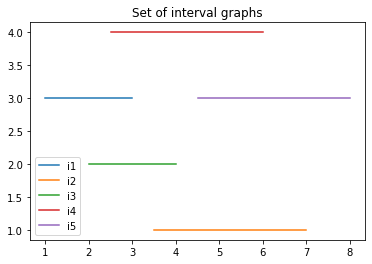

In [172]:
# plt.figure(figsize=(10,3))

for index in range(len(I)):  
    plt.plot([I[index]['a'], I[index]['b']], [y_values[index],y_values[index]], label = 'i' + str(I[index]['i']))

plt.title('Set of interval graphs')
plt.legend()
plt.show()

# Visualize set of intervals as interval graph

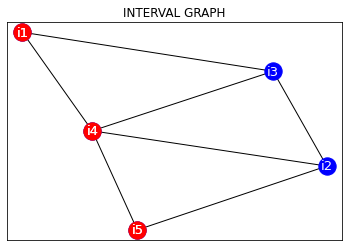

In [173]:
# VISUALIZE THIS AS A GRAPH

edges = []

for index_1 in range(len(I)):
    for index_2 in range(len(I)):
        if index_1 != index_2:
            if (I[index_1]['a'] >= I[index_2]['a'] and I[index_1]['a'] <= I[index_2]['b']) or (I[index_1]['b'] <= I[index_2]['b'] and I[index_1]['b'] >= I[index_2]['a']):
                    edges.append(['i' + str(I[index_1]['i']),'i' + str(I[index_2]['i'])])
G = nx.Graph()
G.add_edges_from(edges)
# generate node positions:
pos = nx.spring_layout(G)

# draw graph
ax = plt.gca()
ax.set_title('INTERVAL GRAPH')
nx.draw_networkx(G, pos=pos, font_size=13, node_color='blue', font_color='white', ax=ax)
# draw subgraph for highlights
for vertex_no in Q_max_2:
    nx.draw_networkx(G.subgraph('i'+str(vertex_no)), pos=pos, font_size=13, node_color='red', font_color='white')

# Plot time from csv

   node        time                                              resut
0  1000    5.813641     [999, 1000, 897, 999, 782, 997, 772, 936, 668]
1  5000  142.523122  [4999, 5000, 4450, 4999, 4864, 4998, 2641, 499...
2  5500  181.076841  [5499, 5500, 5137, 5499, 4282, 5498, 3548, 549...
3  6000  248.534493  [5999, 6000, 5819, 5999, 5000, 5997, 5354, 599...
4  6500  258.539928  [6499, 6500, 5973, 6499, 6216, 6498, 6247, 649...
5  7000  265.904132  [6999, 7000, 6962, 6999, 6913, 6998, 5263, 699...


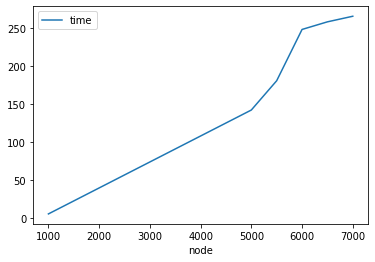

In [161]:
import matplotlib as plt
import pandas as pd

df = pd.read_csv('results.csv')
print(df)
lines = df.plot.line(x='node', y='time')